In [912]:
import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import ast

In [914]:
df = pd.read_csv('movies_metadata.csv')
df.head()

/var/folders/s7/9bjjvvrx3pqg9vv4hsgd66hm0000gn/T/ipykernel_28326/3991525872.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('movies_metadata.csv')


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [915]:
columns = df.columns.tolist()
print("Columns in the dataset:")
print(columns)

Columns in the dataset:
['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id', 'imdb_id', 'original_language', 'original_title', 'overview', 'popularity', 'poster_path', 'production_companies', 'production_countries', 'release_date', 'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title', 'video', 'vote_average', 'vote_count']


The only columns we care about are:
- adult: categorical
- genres: categorical
- original_language: categorical
- budget: numerical
- popularity: numerical
- revenue: numerical
- runtime: numerical
- vote_average: numerical

In [919]:
columns_to_keep = ['adult', 'genres', 'original_language', 'budget', 'popularity', 'revenue', 'runtime', 'vote_average']

df = df[columns_to_keep]
print("\nDataFrame with selected columns:")
df.head()


DataFrame with selected columns:


,adult,genres,original_language,budget,popularity,revenue,runtime,vote_average
0,False,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",en,30000000,21.946943,373554033.0,81.0,7.7
1,False,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",en,65000000,17.015539,262797249.0,104.0,6.9
2,False,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",en,0,11.7129,0.0,101.0,6.5
3,False,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",en,16000000,3.859495,81452156.0,127.0,6.1
4,False,"[{'id': 35, 'name': 'Comedy'}]",en,0,8.387519,76578911.0,106.0,5.7


In [921]:
df['budget'] = pd.to_numeric(df['budget'], errors='coerce')
df['revenue'] = pd.to_numeric(df['revenue'], errors='coerce')
df['runtime'] = pd.to_numeric(df['runtime'], errors='coerce')

In [923]:
# Filter out movies where 'budget' is 0
df = df[(df['budget'] != 0) & (df['revenue'] != 0) & (df['runtime'] != 0)]
df.reset_index(drop=True, inplace=True)
df.head(20)

,adult,genres,original_language,budget,popularity,revenue,runtime,vote_average
0,False,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",en,30000000.0,21.946943,373554033.0,81.0,7.7
1,False,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",en,65000000.0,17.015539,262797249.0,104.0,6.9
2,False,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",en,16000000.0,3.859495,81452156.0,127.0,6.1
3,False,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",en,60000000.0,17.924927,187436818.0,170.0,7.7
4,False,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",en,35000000.0,5.23158,64350171.0,106.0,5.5
5,False,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",en,58000000.0,14.686036,352194034.0,130.0,6.6
6,False,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",en,62000000.0,6.318445,107879496.0,106.0,6.5
7,False,"[{'id': 36, 'name': 'History'}, {'id': 18, 'na...",en,44000000.0,5.092,13681765.0,192.0,7.1
8,False,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",en,98000000.0,7.284477,10017322.0,119.0,5.7
9,False,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",en,52000000.0,10.137389,116112375.0,178.0,7.8


In [925]:
df.shape

(5373, 8)

In [927]:
# filter out movies whose genres is an empty list
df = df[df['genres'].apply(lambda x: isinstance(x, str) and len(ast.literal_eval(x)) > 0)]
df.reset_index(drop=True, inplace=True)
df.shape

(5362, 8)

In [929]:
y = df['revenue'] # we would like to predict revenue, separate it from the df

In [931]:
# Create a copy of the df for encoding
encoded_df = df.copy()

In [933]:
# one hot encode the 'adult' column
encoded_df['adult'] = encoded_df['adult'].apply(lambda x: 1 if x == 'True' else 0)
encoded_df.head()

,adult,genres,original_language,budget,popularity,revenue,runtime,vote_average
0,0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",en,30000000.0,21.946943,373554033.0,81.0,7.7
1,0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",en,65000000.0,17.015539,262797249.0,104.0,6.9
2,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",en,16000000.0,3.859495,81452156.0,127.0,6.1
3,0,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",en,60000000.0,17.924927,187436818.0,170.0,7.7
4,0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",en,35000000.0,5.23158,64350171.0,106.0,5.5


In [935]:
unique_languages = encoded_df['original_language'].unique()
unique_languages

array(['en', 'fr', 'cn', 'ru', 'es', 'zh', 'sv', 'it', 'de', 'ja', 'fa',
       'pt', 'xx', 'da', 'ko', 'el', 'hi', 'pl', 'af', 'fi', 'th', 'nl',
       'ro', 'vi', 'bm', 'he', 'no', 'ta', 'sr', 'nb', 'ca', 'id',
       '104.0', 'tr', 'ml', 'hu', 'kn', 'is', '68.0', 'te', 'mr', '82.0',
       'ur'], dtype=object)

In [937]:
# get rid of the rows where original_language is '68.0' and '82.0'
encoded_df = encoded_df[~encoded_df['original_language'].isin(['68.0', '82.0', '104.0'])]

In [939]:
unique_languages = encoded_df['original_language'].unique()
unique_languages

array(['en', 'fr', 'cn', 'ru', 'es', 'zh', 'sv', 'it', 'de', 'ja', 'fa',
       'pt', 'xx', 'da', 'ko', 'el', 'hi', 'pl', 'af', 'fi', 'th', 'nl',
       'ro', 'vi', 'bm', 'he', 'no', 'ta', 'sr', 'nb', 'ca', 'id', 'tr',
       'ml', 'hu', 'kn', 'is', 'te', 'mr', 'ur'], dtype=object)

In [941]:
top_languages = encoded_df['original_language'].value_counts().head(5).index
top_languages

Index(['en', 'hi', 'fr', 'ru', 'ja'], dtype='object', name='original_language')

The top 5 languages are English, Hindi, French, Russian, and Japanese.

In [944]:
encoded_df['original_language'] = encoded_df['original_language'].apply(
    lambda x: x if x in top_languages else 'other'
)
# find the number of rows whose original_language is 'Other'
num_other_languages = (encoded_df['original_language'] == 'other').sum()
num_other_languages

281

There are 282 movies whose language is not the top 5 language.

In [947]:
# one hot encode original_language column
encoded_df = pd.get_dummies(encoded_df, columns=['original_language'], dtype = int)
encoded_df.head()

,adult,genres,budget,popularity,revenue,runtime,vote_average,original_language_en,original_language_fr,original_language_hi,original_language_ja,original_language_other,original_language_ru
0,0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",30000000.0,21.946943,373554033.0,81.0,7.7,1,0,0,0,0,0
1,0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",65000000.0,17.015539,262797249.0,104.0,6.9,1,0,0,0,0,0
2,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",16000000.0,3.859495,81452156.0,127.0,6.1,1,0,0,0,0,0
3,0,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",60000000.0,17.924927,187436818.0,170.0,7.7,1,0,0,0,0,0
4,0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",35000000.0,5.23158,64350171.0,106.0,5.5,1,0,0,0,0,0


In [949]:
# Convert the string representation of genres to a list of dictionaries
encoded_df['genres'] = encoded_df['genres'].apply(ast.literal_eval)

# get all the unique genres
# Extract just the genre names for each movie
genre_lists = encoded_df['genres'].apply(lambda x: [genre['name'] for genre in x])
genre_lists.head()

0         [Animation, Comedy, Family]
1        [Adventure, Fantasy, Family]
2            [Comedy, Drama, Romance]
3    [Action, Crime, Drama, Thriller]
4       [Action, Adventure, Thriller]
Name: genres, dtype: object

In [951]:
# Create a MultiLabelBinarizer
mlb = MultiLabelBinarizer()

# Transform the genre lists into a binary matrix
genre_matrix = mlb.fit_transform(genre_lists)

# Create a DataFrame with the binary columns
genre_df = pd.DataFrame(genre_matrix, columns=mlb.classes_)

# Concatenate with the original dataframe
encoded_df = pd.concat([encoded_df.drop('genres', axis=1), genre_df], axis=1)

encoded_df.head()

,adult,budget,popularity,revenue,runtime,vote_average,original_language_en,original_language_fr,original_language_hi,original_language_ja,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,0.0,30000000.0,21.946943,373554033.0,81.0,7.7,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,65000000.0,17.015539,262797249.0,104.0,6.9,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,16000000.0,3.859495,81452156.0,127.0,6.1,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,60000000.0,17.924927,187436818.0,170.0,7.7,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,35000000.0,5.23158,64350171.0,106.0,5.5,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [953]:
# filter out movies that has NaN values in any of the columns
encoded_df = encoded_df.dropna()
encoded_df.reset_index(drop=True, inplace=True)
encoded_df.shape

(5355, 32)

In [955]:
encoded_df.tail()

,adult,budget,popularity,revenue,runtime,vote_average,original_language_en,original_language_fr,original_language_hi,original_language_ja,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
5350,0.0,2196531.0,0.947509,2411594.0,107.0,5.6,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
5351,0.0,60000000.0,50.903593,71000000.0,95.0,5.7,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5352,0.0,50000000.0,33.694599,66913939.0,86.0,5.8,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5353,0.0,11000000.0,40.796775,184770205.0,111.0,7.4,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5354,0.0,12000000.0,1.323587,19000000.0,185.0,6.9,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [957]:
columns = encoded_df.columns.tolist()
print("\nColumns in the encoded DataFrame:")
print(columns)
print('Number of columns in the encoded DataFrame:', len(columns))


Columns in the encoded DataFrame:
['adult', 'budget', 'popularity', 'revenue', 'runtime', 'vote_average', 'original_language_en', 'original_language_fr', 'original_language_hi', 'original_language_ja', 'original_language_other', 'original_language_ru', 'Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'Foreign', 'History', 'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western']
Number of columns in the encoded DataFrame: 32


In [959]:
# getting the y from the main df before scaling and applying it to the df
y = encoded_df['revenue']

# dropping the y from the main df
encoded_df = encoded_df.drop(['revenue'], axis=1)

# the main df now 
encoded_df

,adult,budget,popularity,runtime,vote_average,original_language_en,original_language_fr,original_language_hi,original_language_ja,original_language_other,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,0.0,30000000.0,21.946943,81.0,7.7,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,65000000.0,17.015539,104.0,6.9,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,16000000.0,3.859495,127.0,6.1,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,60000000.0,17.924927,170.0,7.7,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,35000000.0,5.23158,106.0,5.5,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5350,0.0,2196531.0,0.947509,107.0,5.6,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
5351,0.0,60000000.0,50.903593,95.0,5.7,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5352,0.0,50000000.0,33.694599,86.0,5.8,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5353,0.0,11000000.0,40.796775,111.0,7.4,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [961]:
# removing the adult secontion due to not enough varity in T and F

# dropping the y from the main df
encoded_df = encoded_df.drop(['adult'], axis=1)

In [963]:
encoded_df.shape

(5355, 30)

In [965]:
# scaler = MinMaxScaler()
# scaled_X = scaler.fit_transform(encoded_df).round(2)
# scaled_X

In [967]:
### testing different scaling technique 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_X = scaler.fit_transform(encoded_df)


In [969]:
Phi = np.hstack((scaled_X, np.ones((scaled_X.shape[0], 1))))

# Linear regression 

In [972]:
# changing the y again
y = np.array(y)
y = y.reshape(-1,1)
y

array([[3.73554033e+08],
       [2.62797249e+08],
       [8.14521560e+07],
       ...,
       [6.69139390e+07],
       [1.84770205e+08],
       [1.90000000e+07]])

In [990]:
# initialize weights w
w = np.zeros((Phi.shape[1], 1))

# Learning rate
learning_rate = 0.001

# defining the number of iterations for training
num_iterations = 10000

# storing weights for plotting
weight_history = []

# getting loss history
loss_history = []

# numebr of samples
num_samples = y.shape[0]

# number of iterations
for i in range(num_iterations):
    # calculate predictions
    predictions = np.dot(Phi, w)

    # dalculate loss
    loss = np.mean((predictions - y)**2)

    # appending to loss
    loss_history.append(loss)

    # derivative of loss with respect to predictions
    dloss = 2 * (predictions - y) / num_samples

    # gradiant of loss with respect to weights
    gradient = np.dot(Phi.T, dloss)

    # uodate weights
    w = w - learning_rate * gradient

    # store current weights
    weight_history.append(w.flatten())

    # print the loss every 100 iterations
    if i % 500 == 0:
        print(f"Iteration {i}, Loss: {loss}")


# final weights and predictions
print("Final weights:")
print(w)
final_predictions = np.dot(Phi, w) # acting "function"
print("Final predictions:")
print(final_predictions)

Iteration 0, Loss: 3.5926153876901756e+16
Iteration 500, Loss: 1.343115513493954e+16
Iteration 1000, Loss: 1.1264801242250174e+16
Iteration 1500, Loss: 1.0876621205386398e+16
Iteration 2000, Loss: 1.078001579583945e+16
Iteration 2500, Loss: 1.074910012177162e+16
Iteration 3000, Loss: 1.0737549224024384e+16
Iteration 3500, Loss: 1.0732876619900842e+16
Iteration 4000, Loss: 1.0730910087205266e+16
Iteration 4500, Loss: 1.0730064502901508e+16
Iteration 5000, Loss: 1.0729696062501876e+16
Iteration 5500, Loss: 1.072953401704844e+16
Iteration 6000, Loss: 1.0729462221505534e+16
Iteration 6500, Loss: 1.072943021254413e+16
Iteration 7000, Loss: 1.0729415861713998e+16
Iteration 7500, Loss: 1.0729409394272242e+16
Iteration 8000, Loss: 1.0729406465345312e+16
Iteration 8500, Loss: 1.0729405132742814e+16
Iteration 9000, Loss: 1.0729404523746138e+16
Iteration 9500, Loss: 1.0729404244259902e+16
Final weights:
[[ 1.08299372e+08]
 [ 3.51198199e+07]
 [ 3.03966895e+06]
 [ 2.59790856e+07]
 [ 3.29643328e+05]

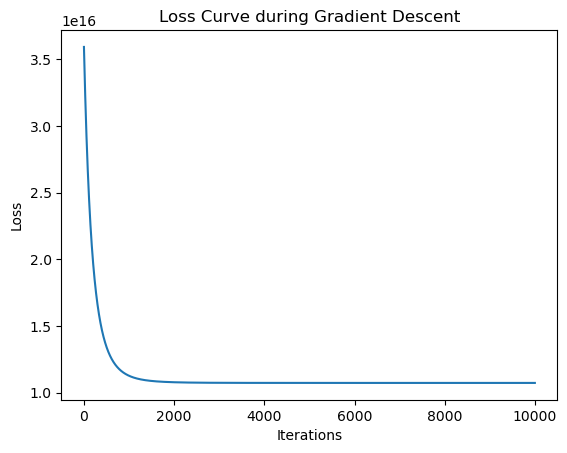

In [992]:
# plotting the loss history
plt.plot(range(num_iterations), loss_history)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss Curve during Gradient Descent')
plt.show()


In [994]:
# doing the multivariate linear regression on the data using the closed-form solution
closed_form = np.dot(np.linalg.inv(np.dot(Phi.T, Phi)), np.dot(Phi.T, y))
closed_form

array([[ 1.07977481e+08],
       [ 3.53186511e+07],
       [ 2.87586746e+06],
       [ 2.58655540e+07],
       [ 2.52533294e+06],
       [-1.06745589e+06],
       [ 2.02065591e+06],
       [ 3.00888006e+05],
       [ 1.32958474e+06],
       [ 4.90014261e+06],
       [ 9.90779541e+05],
       [ 4.38691552e+06],
       [-1.07501130e+06],
       [-4.79034247e+05],
       [-3.85902118e+06],
       [-1.16512291e+05],
       [-7.24820033e+06],
       [ 4.03155979e+06],
       [ 2.07176098e+06],
       [ 9.55355094e+05],
       [-4.74936167e+06],
       [ 4.54025307e+06],
       [-9.77174210e+05],
       [-2.07230068e+06],
       [ 3.29518115e+06],
       [-4.59193432e+06],
       [ 7.35625220e+05],
       [-3.64041736e+06],
       [-1.23356073e+06],
       [-4.28438398e+06],
       [ 9.07143453e+07]])

In [996]:
# check for big corrlation 
Phi_df = pd.DataFrame(Phi)

# compuying the correlation matrix
correlation_matrix = Phi_df.corr()

# displaying the correlation matrix
print(correlation_matrix)


          0         1         2         3         4         5         6   \
0   1.000000  0.306706  0.191058 -0.011055  0.185912 -0.058020 -0.082991   
1   0.306706  1.000000  0.087230  0.159653  0.109791 -0.023944 -0.063118   
2   0.191058  0.087230  1.000000  0.323569 -0.178823 -0.003752  0.260052   
3  -0.011055  0.159653  0.323569  1.000000 -0.103449  0.050910  0.031670   
4   0.185912  0.109791 -0.178823 -0.103449  1.000000 -0.374510 -0.397643   
5  -0.058020 -0.023944 -0.003752  0.050910 -0.374510  1.000000 -0.017740   
6  -0.082991 -0.063118  0.260052  0.031670 -0.397643 -0.017740  1.000000   
7  -0.034561 -0.002899  0.021584  0.070188 -0.248167 -0.011071 -0.011755   
8  -0.128267 -0.071144  0.089311  0.111612 -0.681838 -0.030418 -0.032297   
9  -0.067148 -0.057531 -0.010699 -0.089866 -0.316129 -0.014103 -0.014974   
10  0.194993  0.052932  0.057636 -0.095338 -0.004941 -0.007399  0.009050   
11  0.262450  0.100618  0.060180 -0.019356  0.035021 -0.022118 -0.017159   
12  0.141194

In [980]:
# testing 

# closed form originally didn't work due to giving "singular matrix error"
# suspected high coorlation within values or some type of multicolarity
## suspected the "adult" column, removed it and seemed to work 














# lambda_identity = 0.001 * np.eye(Phi.shape[1])  # Small regularization term
# closed_form = np.dot(np.linalg.inv(np.dot(Phi.T, Phi) + lambda_identity), np.dot(Phi.T, y))
# closed_form

In [998]:
# final total error for each method to assess performance of each method
total_error = np.sum((final_predictions - y)**2)
total_error

5.7455959038399865e+19

total error for gradient descent: 5.7455959038399865e+19
total error for closed-form solution: 5.746647582246492e+19


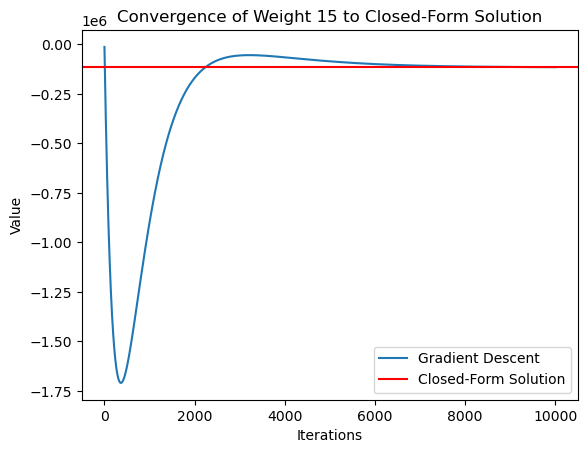

In [1000]:
import matplotlib.pyplot as plt

# total error for gradient descent
total_error_gradient_descent = np.sum((final_predictions - y)**2)
print(f"total error for gradient descent: {total_error_gradient_descent}")

# predictions for the closed-form solution
closed_form_predictions = np.dot(Phi, closed_form)

# calculate the total error for the closed-form solution
total_error_closed_form = np.sum((closed_form_predictions - y)**2)
print(f"total error for closed-form solution: {total_error_closed_form}")

# plot the weight convergence
weight_index = 15
weight_history_specific = [w[weight_index] for w in weight_history]
plt.plot(range(num_iterations), weight_history_specific, label='Gradient Descent')
plt.axhline(y=closed_form[weight_index][0], color='r', label='Closed-Form Solution')
plt.xlabel('Iterations')
plt.ylabel('Value')
plt.title(f'Convergence of Weight {weight_index} to Closed-Form Solution')
plt.legend()
plt.show()

# Polynomial Regression

In [1002]:
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures

# doing polynormial regression from the scaled_x
poly = PolynomialFeatures(2) # second order
phi_poly = poly.fit_transform(scaled_X) 

print(scaled_X.shape)
print(phi_poly.shape)
print(scaled_X[:2])
print(phi_poly[:2])

y

(5355, 30)
(5355, 496)
[[-0.03055239  0.87666741 -1.35108598  1.55551301  0.34514092 -0.12925867
  -0.13724291 -0.08565246 -0.23533034 -0.10910895 -0.59870484 -0.46736499
   4.15649498  1.37985978 -0.43740564 -0.10554849 -0.9645856   3.01094495
  -0.32479429 -0.07753482 -0.21423921 -0.35053803 -0.19284108 -0.300312
  -0.48242596 -0.36613299 -0.01366661 -0.62464943 -0.19900744 -0.13000336]
 [ 0.83988607  0.5202649  -0.28117474  0.67898322  0.34514092 -0.12925867
  -0.13724291 -0.08565246 -0.23533034 -0.10910895 -0.59870484  2.13965535
  -0.24058732 -0.72471132 -0.43740564 -0.10554849 -0.9645856   3.01094495
   3.07887188 -0.07753482 -0.21423921 -0.35053803 -0.19284108 -0.300312
  -0.48242596 -0.36613299 -0.01366661 -0.62464943 -0.19900744 -0.13000336]]
[[ 1.00000000e+00 -3.05523917e-02  8.76667407e-01 -1.35108598e+00
   1.55551301e+00  3.45140923e-01 -1.29258668e-01 -1.37242910e-01
  -8.56524554e-02 -2.35330343e-01 -1.09108945e-01 -5.98704843e-01
  -4.67364990e-01  4.15649498e+00  1.379

array([[3.73554033e+08],
       [2.62797249e+08],
       [8.14521560e+07],
       ...,
       [6.69139390e+07],
       [1.84770205e+08],
       [1.90000000e+07]])

In [1022]:
n = phi_poly.shape[0]
n

5355

In [1032]:
# poly gradiant decant
w_gd = np.ones(phi_poly.shape[1]).reshape(-1,1)
eta = 0.2
n = phi_poly.shape[0]

def f(w):
	p = (np.dot(phi_poly,w) - y)
	return (1/n)*np.dot(np.transpose(p), p).item()

f_value_list = []
for i in range(1000):
    dfx = (2/n)*phi_poly.T.dot(phi_poly.dot(w_gd) - y)
    w_gd = w_gd - eta*dfx
    f_value_list.append(f(w_gd))


print('Best GD w = \n', w_gd)
print('Final GD Error = \n', f(w_gd))


Best GD w = 
 [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]

In [1004]:
# closed form
phi_phi_inv = np.linalg.inv(np.dot(phi_poly.T, phi_poly)* np.eye(phi_poly.shape[1]))
w_closed = np.dot(phi_phi_inv, np.dot(phi_poly.T, y))
print("Closed-form weights:", w_closed)


y_pred_closed = np.dot(phi_poly, w_closed)
error_closed = np.mean((y_pred_closed - y) ** 2)
print("Total error for closed-form regression:", error_closed)


Closed-form weights: [[ 9.07143453e+07]
 [ 1.21477226e+08]
 [ 7.31854144e+07]
 [ 3.15684917e+07]
 [ 2.77653521e+07]
 [ 2.20991781e+07]
 [-8.53416015e+06]
 [-9.02333044e+06]
 [-2.92385906e+06]
 [-1.49360292e+07]
 [-8.67984864e+06]
 [ 2.07453795e+07]
 [ 3.77601647e+07]
 [ 2.19929410e+07]
 [-5.01105507e+06]
 [-8.91026185e+06]
 [-6.56137203e+06]
 [-2.10811567e+07]
 [ 2.39133139e+07]
 [ 2.58909364e+07]
 [-3.78691400e+06]
 [-2.78459367e+06]
 [-9.83459066e+06]
 [-4.26504359e+06]
 [-3.33592820e+06]
 [-9.10607332e+06]
 [ 1.32057699e+07]
 [-6.65759982e+05]
 [-1.15447180e+06]
 [-2.08860139e+06]
 [-5.45064992e+06]
 [ 3.92549498e+07]
 [ 3.59509093e+07]
 [ 6.77732374e+07]
 [ 6.12543363e+07]
 [ 9.53116835e+07]
 [-4.91987770e+07]
 [-4.62995604e+07]
 [-4.21988754e+07]
 [-6.43918174e+07]
 [-3.32036618e+07]
 [ 5.06792300e+07]
 [ 5.49537589e+07]
 [ 2.28342914e+07]
 [-3.10022031e+07]
 [-3.61541604e+07]
 [-2.01843908e+07]
 [-5.29830907e+07]
 [ 2.85988073e+07]
 [ 3.86732513e+07]
 [-8.14557226e+06]
 [-2.47368

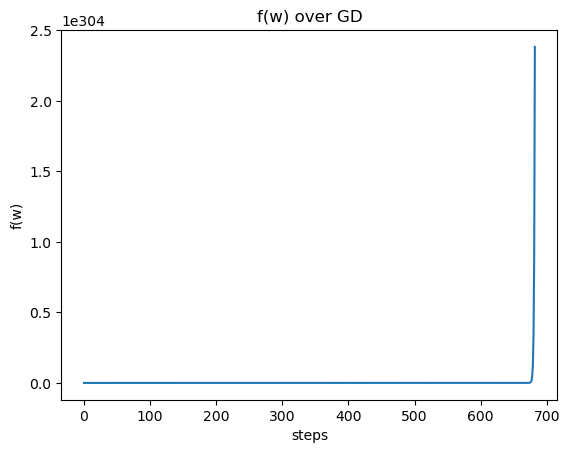

In [1006]:
# make sure it's converging
plt.plot(f_value_list)
plt.title('f(w) over GD')
plt.xlabel('steps')
plt.ylabel('f(w)')
plt.show()

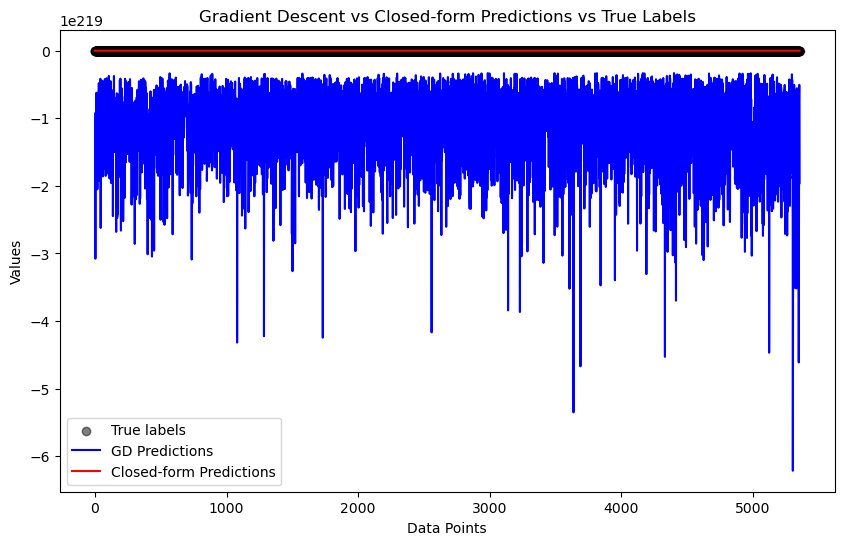

In [1008]:
# predictions from Gradient Descent
y_pred_gd = np.dot(phi_poly, w_gd)
y_pred_closed = np.dot(phi_poly, w_closed)
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y)), y, color='black', label='True labels', alpha=0.5)
plt.plot(range(len(y_pred_gd)), y_pred_gd, color='blue', label='GD Predictions')
plt.plot(range(len(y_pred_closed)), y_pred_closed, color='red', label='Closed-form Predictions')
plt.xlabel('Data Points')
plt.ylabel('Values')
plt.title('Gradient Descent vs Closed-form Predictions vs True Labels')
plt.legend()
plt.show()
